In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as hc
from sklearn.preprocessing import normalize
from sklearn.cluster import AgglomerativeClustering
from mpl_toolkits.mplot3d import Axes3D 

In [2]:
df = pd.read_csv("LargeCustomers.csv")

In [5]:
df.set_index('CustomerID',inplace=True)

In [7]:
df.drop('labels',axis=1,inplace=True)

In [9]:
df_log = df[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis = 1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000163D7B62F88>,
      dtype=object)

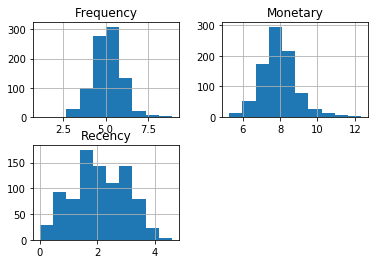

In [11]:
df_log.hist()

In [13]:
#Normalize
df_scaled = pd.DataFrame(normalize(df_log), columns=['Recency','Frequency','Monetary'])

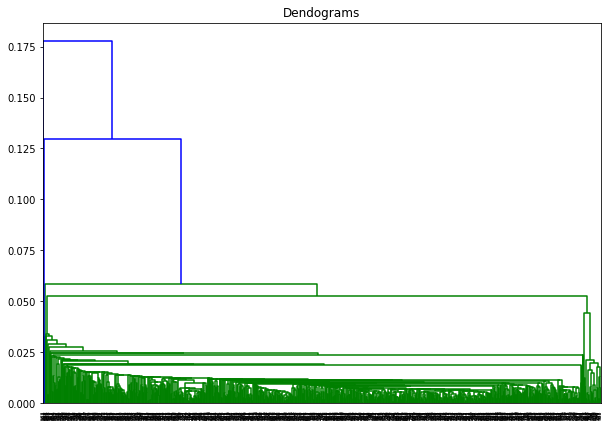

In [14]:
plt.figure(figsize=(10,7)) # Increase size of plot to make it easier to review
plt.title("Dendograms")
dend = hc.dendrogram(hc.linkage(df_scaled, method='single'))

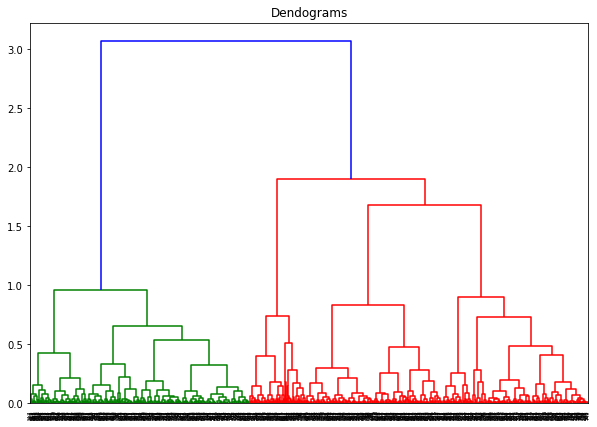

In [16]:
plt.figure(figsize=(10,7)) # Increase size of plot to make it easier to review
plt.title("Dendograms")
dend = hc.dendrogram(hc.linkage(df_scaled, method='ward'))

In [18]:
model = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
labels = model.fit_predict(df_scaled)

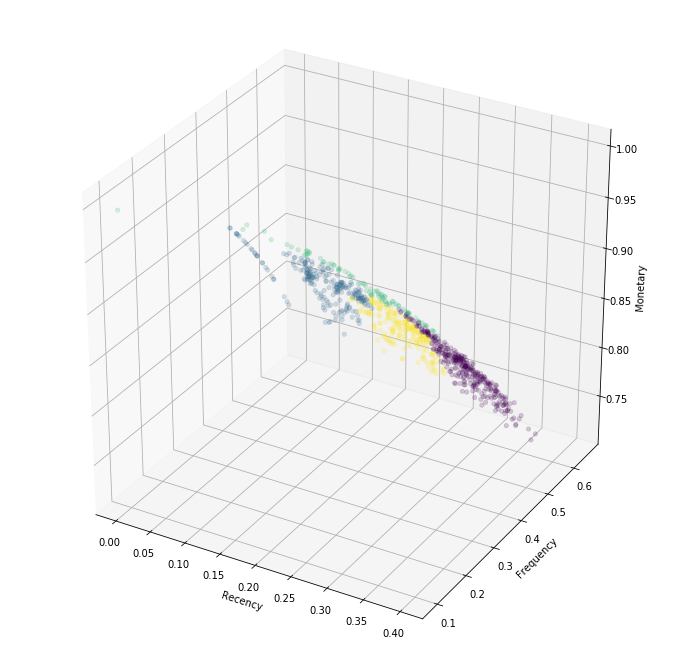

In [21]:
fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection='3d')
ax.scatter(df_scaled.Recency, df_scaled.Frequency, df_scaled.Monetary, c=labels, cmap='viridis', linewidth=0.5, alpha=0.2);
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.show()

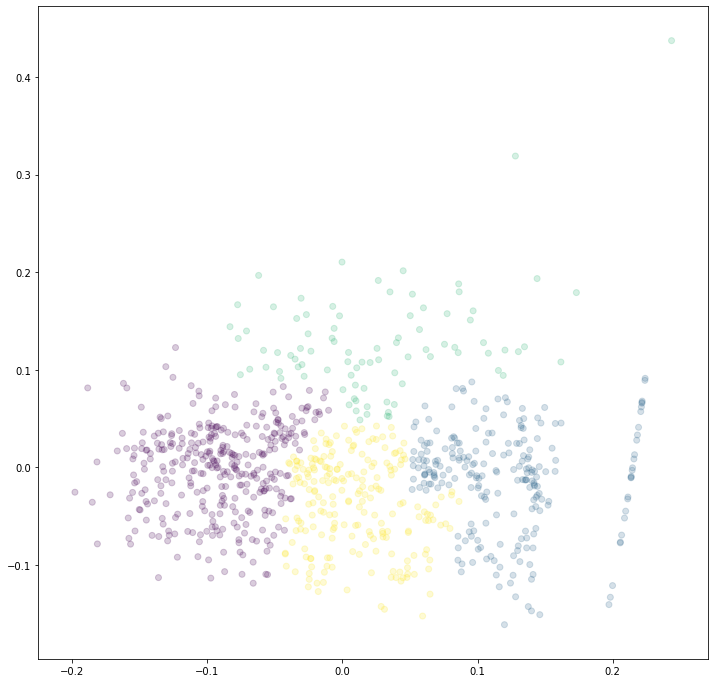

In [22]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(df_scaled)
df_pca2 = pca.transform(df_scaled)

(x, y) = (df_pca2[:,0], df_pca2[:,1])
plt.figure(figsize=(12,12))
plt.scatter(x,y, c=labels, alpha=0.2, cmap='viridis')
plt.show()

In [23]:
df['labels'] = labels

In [25]:
df.groupby(by='labels').mean()

,Frequency,Monetary,Recency
cluster,,,
0,204.473837,3196.896860,22.072674
1,327.258772,7781.446667,2.688596
2,61.840909,12128.398523,8.306818
3,291.093023,3762.895395,7.418605
